Explore the database

In [10]:
import functions as f
import pymongo

In [11]:
#connect to your server - it should be running at 'mongodb://127.0.0.1:27017/'
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

#grab a database from your server 
mydb = myclient['soccer_2011_season']

In [12]:
#initialize an empty collection - this where your 'documents' will go
mycollection = mydb['team_data_collection']

In [13]:
#get list of all team names
teams = f.all_teams('2011')
team_class = []
# intantiate classes team 
for team in teams:
    team_class.append(f.team(team, '2011'))

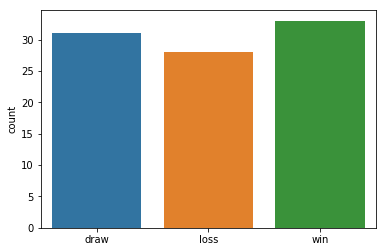

In [14]:
doc_list = []
for team in team_class:
    try:
        document = {'Team' : team.team,
                    'Goals Scored': team.total_goals(),
                     'Total Wins' : team.total_wins(),
                     'Histogram' : team.get_barplot(),
                     'Win Percent in Rain': team.win_percent_rain(),
                   }
        doc_list.append(document)
    except:
        pass


In [15]:
mycollection.insert_many(doc_list)